In [2]:
import bnlearn as bn

In [3]:
df = bn.import_example()

[bnlearn] >Downloading example [sprinkler] dataset..
[bnlearn] >Import dataset..


In [7]:
model = bn.structure_learning.fit(df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'Cloudy': array([0.95967978, 0.66184799]),
  'Sprinkler': array([-0.20079231,  0.16328625]),
  'Rain': array([ 0.24111253, -0.104256  ]),
  'Wet_Grass': array([-1.        , -0.72087823])},
 'G': <networkx.classes.digraph.DiGraph at 0x7fd35d461430>,
 'node_properties': {'Cloudy': {'node_color': '#1f456e', 'node_size': 800},
  'Sprinkler': {'node_color': '#1f456e', 'node_size': 800},
  'Rain': {'node_color': '#1f456e', 'node_size': 800},
  'Wet_Grass': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Cloudy', 'Rain'): {'color': '#000000', 'weight': 1},
  ('Sprinkler', 'Cloudy'): {'color': '#000000', 'weight': 1},
  ('Sprinkler', 'Wet_Grass'): {'color': '#000000', 'weight': 1},
  ('Rain', 'Wet_Grass'): {'color': '#000000', 'weight': 1}}}

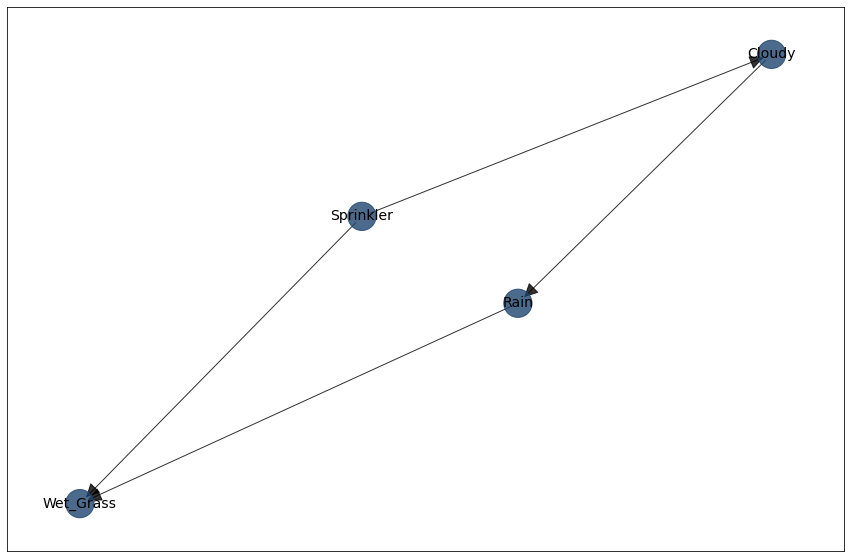

In [8]:
bn.plot(model)

In [10]:
bayes_model = bn.parameter_learning.fit(model=model, df=df, methodtype='bayes')
mle_model = bn.parameter_learning.fit(model=model, df=df, methodtype='maximumlikelihood')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Cloudy:
+-----------+--------------------+--------------------+
| Sprinkler | Sprinkler(0)       | Sprinkler(1)       |
+-----------+--------------------+--------------------+
| Cloudy(0) | 0.3988245172124265 | 0.6341161928306551 |
+-----------+--------------------+--------------------+
| Cloudy(1) | 0.6011754827875735 | 0.3658838071693449 |
+-----------+--------------------+--------------------+
[bnlearn] >CPD of Rain:
+---------+--------------------+---------------------+
| Cloudy  | Cloudy(0)          | Cloudy(1)           |
+---------+--------------------+---------------------+
| Rain(0) | 0.6518218623481782 | 0.33695652173913043 |
+---------+--------------------+---------------------+
| Rain(1) | 0.3481781376518219 | 0.6630434782608695  |
+---------+--------------------+--

See the next cell, it works as expected with Rain = 1 sprinkler = 0 as evidence.

In [19]:
query = bn.inference.fit(bayes_model, variables=['Wet_Grass'], evidence={'Rain':1, 'Sprinkler':0})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-------------+----------+
|    |   Wet_Grass |        p |
+====+=============+==========+
|  0 |           0 | 0.255882 |
+----+-------------+----------+
|  1 |           1 | 0.744118 |
+----+-------------+----------+


Now see this following cell, if say i want there to be a .50 for Rain and 0.50 for sprinkler i get an error

In [20]:
query = bn.inference.fit(bayes_model, variables=['Wet_Grass'], evidence={'Rain':0.5, 'Sprinkler':0.5})

[bnlearn] >Variable Elimination..


KeyError: 0.5